<a href="https://colab.research.google.com/github/khrisnapriana/Fit-Body-Prediction-with-Random-Forest/blob/main/Fit_Body_Prediction_with_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MACHINE LEARNING**

**Analisis Klasifikasi Bentuk Badan Pengguna Suatu Aplikasi Dating**

## **Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
!pip install category_encoders
from category_encoders import HashingEncoder
from sklearn.model_selection import RandomizedSearchCV

## **Import Dataset**

In [ ]:
df_ori = pd.read_csv('train.csv')

In [ ]:
df = df_ori.copy()
df

,id,age,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,fit_body
0,33904,29,NaN,socially,never,graduated from law school,"asian, hispanic / latin, white",69.0,-1,law / legal services,NaN,straight,likes dogs,catholicism,m,aquarius but it doesn&rsquo;t matter,no,"english (fluently), spanish (okay), korean (po...",single,yes
1,35538,19,NaN,NaN,NaN,NaN,other,69.0,-1,NaN,NaN,bisexual,has cats,buddhism,f,taurus,NaN,english,single,no
2,36731,32,mostly anything,socially,NaN,dropped out of college/university,white,69.0,100000,executive / management,NaN,straight,likes dogs and likes cats,christianity but not too serious about it,m,virgo but it doesn&rsquo;t matter,no,english (fluently),single,no
3,16304,36,strictly anything,socially,NaN,graduated from college/university,white,67.0,100000,computer / hardware / software,doesn&rsquo;t have kids,straight,likes dogs,atheism but not too serious about it,m,cancer but it doesn&rsquo;t matter,no,"english (okay), english (fluently), english (p...",single,no
4,19727,22,NaN,socially,never,graduated from college/university,asian,68.0,-1,computer / hardware / software,NaN,straight,NaN,NaN,m,NaN,no,"english, chinese",single,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40834,43498,24,anything,socially,never,graduated from college/university,white,70.0,-1,artistic / musical / writer,doesn&rsquo;t want kids,straight,likes dogs and likes cats,atheism but not too serious about it,f,sagittarius but it doesn&rsquo;t matter,no,"english (fluently), french (okay), spanish (po...",single,yes
40835,5149,30,strictly anything,socially,never,graduated from college/university,asian,69.0,-1,banking / financial / real estate,doesn&rsquo;t have kids,straight,likes dogs,agnosticism,m,sagittarius but it doesn&rsquo;t matter,no,"english (fluently), chinese (okay)",single,yes
40836,2085,34,anything,socially,NaN,graduated from ph.d program,NaN,62.0,-1,science / tech / engineering,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,NaN,m,leo but it doesn&rsquo;t matter,NaN,"english, spanish",single,yes
40837,6212,28,anything,socially,never,graduated from college/university,white,72.0,40000,construction / craftsmanship,doesn&rsquo;t have kids,straight,has dogs and likes cats,atheism and laughing about it,m,scorpio but it doesn&rsquo;t matter,no,english,single,no


## **Data Preparation & Cleaning**

In [ ]:
df.columns

Index(['id', 'age', 'diet', 'drinks', 'drugs', 'education', 'ethnicity',
       'height', 'income', 'job', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status', 'fit_body'],
      dtype='object')

In [ ]:
#mengecek missing value/null
df.isna().sum()

id                 0
age                0
diet           15396
drinks          1739
drugs           9245
education       4257
ethnicity       3422
height             0
income             0
job             5080
offspring      23628
orientation        0
pets           13248
religion       13347
sex                0
sign            7221
smokes          3340
speaks            28
status             0
fit_body           0
dtype: int64

In [ ]:
map_missing_data = {'diet': 'anything',
                    'drinks': 'socially',
                    'drugs': 'never',
                    'education': 'unknown',
                    'ethnicity': 'other',
                    'job': 'rather not say',
                    'offspring': 'unknown',
                    'pets': 'unknown',
                    'religion': 'atheism',
                    'sign': 'but it doesn’t matter',
                    'smokes': 'never',
                    'speaks': 'unknown'}

In [ ]:
def fill_missing_data(df):
    df_filled = df.copy()
    for col in df_filled.columns:
        if df_filled[col].dtype == 'O':  # Check if column is of object (string) type
            df_filled[col] = df_filled[col].fillna(map_missing_data.get(col, 'unknown'))
        else:
            df_filled[col] = df_filled[col].fillna(df_filled[col].mean())
    return df_filled

In [ ]:
fill_miss = FunctionTransformer(func=fill_missing_data, validate=False)

In [ ]:
# Proses pengisian nilai null
df_notnull = fill_miss.transform(df)

df_notnull

,id,age,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,fit_body
0,33904,29,anything,socially,never,graduated from law school,"asian, hispanic / latin, white",69.0,-1,law / legal services,unknown,straight,likes dogs,catholicism,m,aquarius but it doesn&rsquo;t matter,no,"english (fluently), spanish (okay), korean (po...",single,yes
1,35538,19,anything,socially,never,unknown,other,69.0,-1,rather not say,unknown,bisexual,has cats,buddhism,f,taurus,never,english,single,no
2,36731,32,mostly anything,socially,never,dropped out of college/university,white,69.0,100000,executive / management,unknown,straight,likes dogs and likes cats,christianity but not too serious about it,m,virgo but it doesn&rsquo;t matter,no,english (fluently),single,no
3,16304,36,strictly anything,socially,never,graduated from college/university,white,67.0,100000,computer / hardware / software,doesn&rsquo;t have kids,straight,likes dogs,atheism but not too serious about it,m,cancer but it doesn&rsquo;t matter,no,"english (okay), english (fluently), english (p...",single,no
4,19727,22,anything,socially,never,graduated from college/university,asian,68.0,-1,computer / hardware / software,unknown,straight,unknown,atheism,m,but it doesn’t matter,no,"english, chinese",single,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40834,43498,24,anything,socially,never,graduated from college/university,white,70.0,-1,artistic / musical / writer,doesn&rsquo;t want kids,straight,likes dogs and likes cats,atheism but not too serious about it,f,sagittarius but it doesn&rsquo;t matter,no,"english (fluently), french (okay), spanish (po...",single,yes
40835,5149,30,strictly anything,socially,never,graduated from college/university,asian,69.0,-1,banking / financial / real estate,doesn&rsquo;t have kids,straight,likes dogs,agnosticism,m,sagittarius but it doesn&rsquo;t matter,no,"english (fluently), chinese (okay)",single,yes
40836,2085,34,anything,socially,never,graduated from ph.d program,other,62.0,-1,science / tech / engineering,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,atheism,m,leo but it doesn&rsquo;t matter,never,"english, spanish",single,yes
40837,6212,28,anything,socially,never,graduated from college/university,white,72.0,40000,construction / craftsmanship,doesn&rsquo;t have kids,straight,has dogs and likes cats,atheism and laughing about it,m,scorpio but it doesn&rsquo;t matter,no,english,single,no


In [ ]:
df_notnull.isna().sum()

id             0
age            0
diet           0
drinks         0
drugs          0
education      0
ethnicity      0
height         0
income         0
job            0
offspring      0
orientation    0
pets           0
religion       0
sex            0
sign           0
smokes         0
speaks         0
status         0
fit_body       0
dtype: int64

## **Data Preprocessing**

In [ ]:
df_notnull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           40839 non-null  int64  
 1   age          40839 non-null  int64  
 2   diet         40839 non-null  object 
 3   drinks       40839 non-null  object 
 4   drugs        40839 non-null  object 
 5   education    40839 non-null  object 
 6   ethnicity    40839 non-null  object 
 7   height       40839 non-null  float64
 8   income       40839 non-null  int64  
 9   job          40839 non-null  object 
 10  offspring    40839 non-null  object 
 11  orientation  40839 non-null  object 
 12  pets         40839 non-null  object 
 13  religion     40839 non-null  object 
 14  sex          40839 non-null  object 
 15  sign         40839 non-null  object 
 16  smokes       40839 non-null  object 
 17  speaks       40839 non-null  object 
 18  status       40839 non-null  object 
 19  fit_

In [ ]:
#menggunakan HashingEncoder
hash = HashingEncoder(cols=['diet',	'drinks',	'drugs',	'education',	'ethnicity',	'job',	'offspring',	'orientation',	'pets',	'religion', 'sex', 'sign',	'smokes',	'speaks',	'status'], n_components=5)
df_hash = hash.fit_transform(df_notnull)

In [ ]:
df_hash

,col_0,col_1,col_2,col_3,col_4,id,age,height,income,fit_body
0,3,5,2,1,4,33904,29,69.0,-1,yes
1,3,2,3,3,4,35538,19,69.0,-1,no
2,4,4,3,2,2,36731,32,69.0,100000,no
3,3,2,4,3,3,16304,36,67.0,100000,no
4,5,4,2,3,1,19727,22,68.0,-1,no
...,...,...,...,...,...,...,...,...,...,...
40834,7,1,4,1,2,43498,24,70.0,-1,yes
40835,4,3,2,2,4,5149,30,69.0,-1,yes
40836,6,2,3,3,1,2085,34,62.0,-1,yes
40837,4,3,3,3,2,6212,28,72.0,40000,no


## **Split Dataset**

In [ ]:
x = df_hash.drop('fit_body', axis=1)
y = df_hash['fit_body']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("\nSplit dataset:", x_train.shape, x_test.shape, y_train.shape, y_test.shape)


Split dataset: (32671, 9) (8168, 9) (32671,) (8168,)


## **1. Model Random Forest#1**

### **Feature Selection RF**

In [ ]:
#inisialisasi model RF
model_RF = RandomForestClassifier()

In [ ]:
#RFE
rfe = RFE(model_RF, n_features_to_select=5)  #ubah n_features_to_select sesuai kebutuhan
rfe_fit = rfe.fit(x_train, y_train)

In [ ]:
#menampilkan hasil seleksi fitur
print("Selected Features:")
for i in range(len(x.columns)):
    if rfe_fit.support_[i]:
        print(x.columns[i])

Selected Features:
col_1
col_3
id
age
height


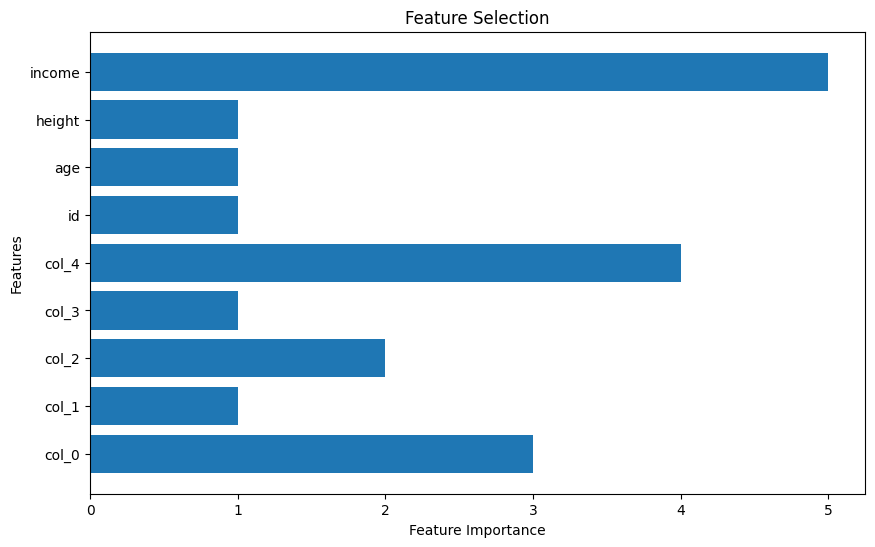

In [ ]:
#membuat plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(x.columns)), rfe_fit.ranking_)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Selection')
plt.yticks(range(len(x.columns)), x.columns)
plt.show()

In [ ]:
#transformasi data menggunakan fitur yang terpilih
x_train_fs = rfe.transform(x_train)
x_test_fs = rfe.transform(x_test)

### **Evaluasi Model RF**

In [ ]:
model_RFo = RandomForestClassifier(n_estimators=150, random_state=42)

# Fit model pada data latih
model_RFo.fit(x_train_fs, y_train)

# Prediksi
y_pred_test = model_RFo.predict(x_test_fs)

# Evaluasi model
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.5190989226248776


### **Uji Model RF**

In [ ]:
# Memuat data baru
df_new = pd.read_csv('test.csv')

In [ ]:
df_new.isna().sum()

id                0
age               0
diet           5126
drinks          577
drugs          3099
education      1427
ethnicity      1118
height            0
income            0
job            1746
offspring      7850
orientation       0
pets           4388
religion       4389
sex               0
sign           2429
smokes         1160
speaks           12
status            0
dtype: int64

In [ ]:
# Proses pengisian nilai null
df_new_notnull = fill_miss.transform(df_new)

In [ ]:
df_new_notnull.isna().sum()

id             0
age            0
diet           0
drinks         0
drugs          0
education      0
ethnicity      0
height         0
income         0
job            0
offspring      0
orientation    0
pets           0
religion       0
sex            0
sign           0
smokes         0
speaks         0
status         0
dtype: int64

In [ ]:
df_new_hash = hash.fit_transform(df_new_notnull)

df_new_hash

,col_0,col_1,col_2,col_3,col_4,id,age,height,income
0,5,4,1,3,2,30968,25,73.0,-1
1,3,4,1,4,3,36173,22,64.0,-1
2,4,1,4,4,2,32466,44,73.0,-1
3,6,3,2,2,2,27038,28,71.0,-1
4,5,3,3,1,3,17610,26,74.0,-1
...,...,...,...,...,...,...,...,...,...
13608,4,3,3,2,3,20510,28,66.0,80000
13609,4,4,3,2,2,54432,32,63.0,-1
13610,3,4,3,5,0,49664,25,70.0,-1
13611,4,2,4,2,3,43797,45,62.0,80000


In [ ]:
df_test_csv = df_new_hash[['col_1', 'col_3', 'id', 'age', 'height']]

# Prediksi
predict = model_RFo.predict(df_test_csv)

# Tambahkan prediksi fit_body ke DataFrame x_test_predict
df_test_csv['fit_body'] = predict

# Tampilkan DataFrame dengan prediksi fit_body
print(df_test_csv)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


       col_1  col_3     id  age  height fit_body
0          4      3  30968   25    73.0      yes
1          4      4  36173   22    64.0       no
2          1      4  32466   44    73.0      yes
3          3      2  27038   28    71.0      yes
4          3      1  17610   26    74.0      yes
...      ...    ...    ...  ...     ...      ...
13608      3      2  20510   28    66.0      yes
13609      4      2  54432   32    63.0       no
13610      4      5  49664   25    70.0       no
13611      2      2  43797   45    62.0      yes
13612      3      3  15637   43    69.0      yes

[13613 rows x 6 columns]


<ipython-input-38-fafaf72cc1f7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_csv['fit_body'] = predict


In [ ]:
category_counts = df_test_csv['fit_body'].value_counts()
category_counts

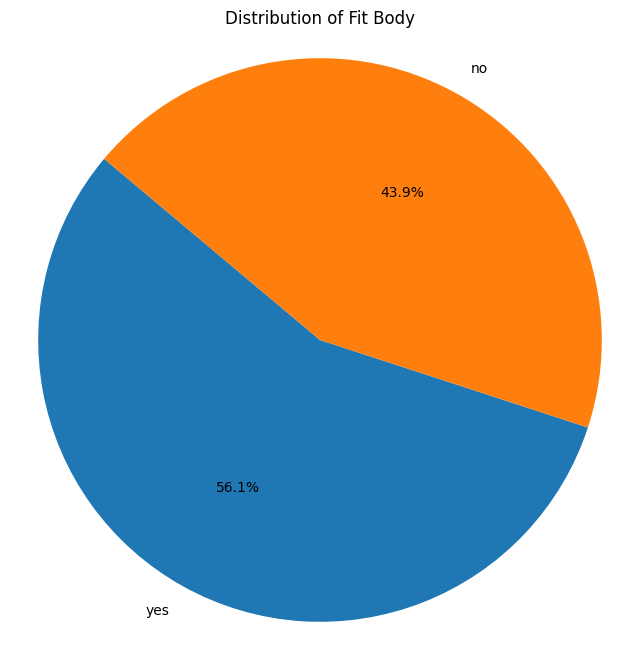

In [ ]:
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Fit Body')  # Set the title of the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [ ]:
df_csv = df_test_csv[['id']].copy()
df_csv['fit_body'] = predict

In [ ]:
df_csv

,id,fit_body
0,30968,yes
1,36173,no
2,32466,yes
3,27038,yes
4,17610,yes
...,...,...
13608,20510,yes
13609,54432,no
13610,49664,no
13611,43797,yes


In [ ]:
df_csv.to_csv('submission3.csv', index=False)

## **2. Model Random Forest#2**

In [ ]:
# Inisialisasi model Random Forest
model_RF2 = RandomForestClassifier()

# Definisi grid parameter yang akan dijelajahi
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Inisialisasi RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model_RF2, param_distributions=param_distributions, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1)

# Latih model pada data latih dengan RandomizedSearchCV
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy')

In [ ]:
# # Prediksi pada data uji menggunakan model terbaik
best_model = random_search.best_estimator_
print(best_model)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=300)


### **Evaluasi Model RF with RandomSearchCV**

In [ ]:
# Prediksi pada data uji menggunakan model dengan parameter terbaik
y_pred = best_model.predict(x_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.5530117531831538


### **Uji Model RF with RandomSearchCV**

In [ ]:
# Memuat data baru
df_new = pd.read_csv('test.csv')

In [ ]:
df_new.isna().sum()

id                0
age               0
diet           5126
drinks          577
drugs          3099
education      1427
ethnicity      1118
height            0
income            0
job            1746
offspring      7850
orientation       0
pets           4388
religion       4389
sex               0
sign           2429
smokes         1160
speaks           12
status            0
dtype: int64

In [ ]:
# Proses pengisian nilai null
df_new_notnull = fill_miss.transform(df_new)

In [ ]:
df_new_notnull.isna().sum()

id             0
age            0
diet           0
drinks         0
drugs          0
education      0
ethnicity      0
height         0
income         0
job            0
offspring      0
orientation    0
pets           0
religion       0
sex            0
sign           0
smokes         0
speaks         0
status         0
dtype: int64

In [ ]:
df_new_hash = hash.fit_transform(df_new_notnull)

df_new_hash

,col_0,col_1,col_2,col_3,col_4,id,age,height,income
0,5,4,1,3,2,30968,25,73.0,-1
1,3,4,1,4,3,36173,22,64.0,-1
2,4,1,4,4,2,32466,44,73.0,-1
3,6,3,2,2,2,27038,28,71.0,-1
4,5,3,3,1,3,17610,26,74.0,-1
...,...,...,...,...,...,...,...,...,...
13608,4,3,3,2,3,20510,28,66.0,80000
13609,4,4,3,2,2,54432,32,63.0,-1
13610,3,4,3,5,0,49664,25,70.0,-1
13611,4,2,4,2,3,43797,45,62.0,80000


In [ ]:
# Prediksi
predict = best_model.predict(df_new_hash)

# Tambahkan prediksi fit_body ke DataFrame x_test_predict
df_new_hash['fit_body'] = predict

# Tampilkan DataFrame dengan prediksi fit_body
print(df_new_hash)

       col_0  col_1  col_2  col_3  col_4     id  age  height  income fit_body
0          5      4      1      3      2  30968   25    73.0      -1      yes
1          3      4      1      4      3  36173   22    64.0      -1       no
2          4      1      4      4      2  32466   44    73.0      -1      yes
3          6      3      2      2      2  27038   28    71.0      -1      yes
4          5      3      3      1      3  17610   26    74.0      -1      yes
...      ...    ...    ...    ...    ...    ...  ...     ...     ...      ...
13608      4      3      3      2      3  20510   28    66.0   80000      yes
13609      4      4      3      2      2  54432   32    63.0      -1      yes
13610      3      4      3      5      0  49664   25    70.0      -1      yes
13611      4      2      4      2      3  43797   45    62.0   80000      yes
13612      5      3      1      3      3  15637   43    69.0      -1      yes

[13613 rows x 10 columns]


In [ ]:
category_counts = df_new_hash['fit_body'].value_counts()
category_counts

fit_body
yes    9787
no     3826
Name: count, dtype: int64

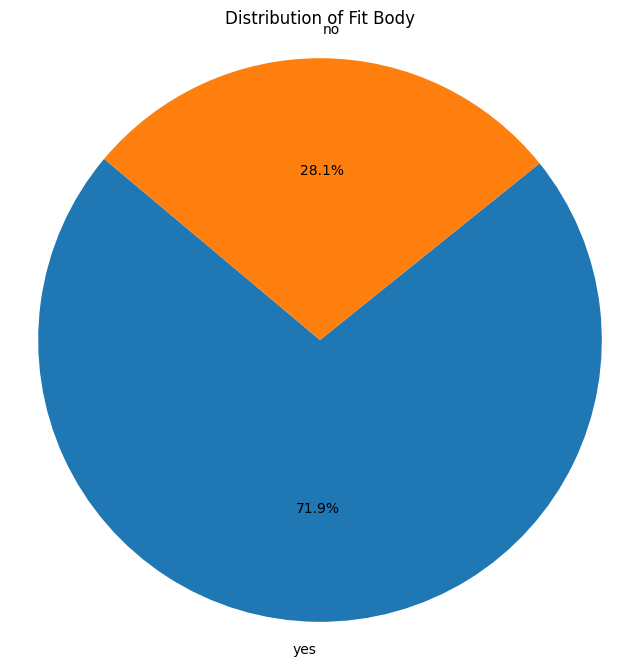

In [ ]:
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Fit Body')  # Set the title of the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [ ]:
df_55 = df_new_hash[['id']].copy()
df_55['fit_body'] = predict

In [ ]:
df_55

,id,fit_body
0,30968,yes
1,36173,no
2,32466,yes
3,27038,yes
4,17610,yes
...,...,...
13608,20510,yes
13609,54432,yes
13610,49664,yes
13611,43797,yes


In [ ]:
df_55.to_csv('submission03.csv', index=False)